In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [31]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


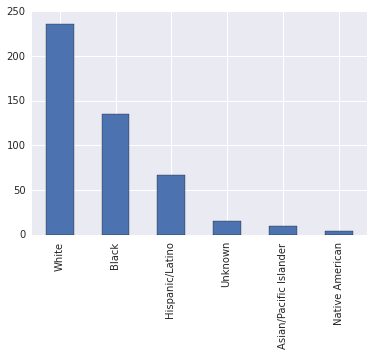

In [32]:
value_of_each_race = police_killings['raceethnicity'].value_counts()
value_of_each_race.plot(kind='bar')

In [33]:
value_of_each_race / sum(value_of_each_race) *100

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

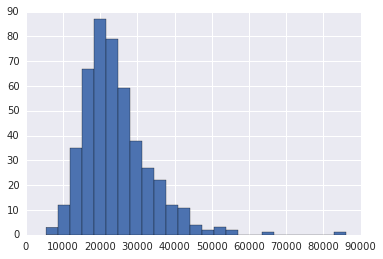

In [34]:
per_income = police_killings[police_killings['p_income'] > '0']
income = per_income['p_income'].astype(float)
income.hist(bins=25)

In [35]:
income.median()

22348.0

Value Counts on state_fp column of police_killings will result in a Pandas Series, where the index is the code for each state, and the values are the numbers of police killings in each state. It is coded below.

In [36]:
state_pop = pd.read_csv('state_population.csv')
counts = police_killings['state_fp'].value_counts()
counts

6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
Name: state_fp, dtype: int64

In [37]:
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [38]:
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on="STATE")
states

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4
5,13,16,40,3,5,Georgia,10214860,7710688,75.5
6,36,13,40,1,2,New York,19795791,15584974,78.7
7,8,12,40,4,8,Colorado,5456574,4199509,77.0
8,34,11,40,1,2,New Jersey,8958013,6959192,77.7
9,53,11,40,4,9,Washington,7170351,5558509,77.5


In [39]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['rate'] = states['shootings'] / states['pop_millions']
states.sort_values(by='rate', ascending=0)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,1.654930,2.417021
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,2.085109,2.397956
10,22,11,40,3,7,Louisiana,4670724,3555911,76.1,4.670724,2.355095
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,5.456574,2.199182
41,10,2,40,3,5,Delaware,945934,741548,78.4,0.945934,2.114312


In [40]:
pk = police_killings[(police_killings['share_white'] != '-')
                    & (police_killings['share_black'] != '-')
                    & (police_killings['share_hispanic'] != '-')]

pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)


/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [45]:
ls = states.sort_values(by='rate').head(10)
ls_code = ls['STATE'].tolist()
lowest = pk[pk['state_fp'].isin(ls_code)]
lowest_states = lowest['state'].value_counts().index.tolist()

lower = pk[pk['state'].isin(lowest_states)]

lower.mean()

day               1.491071e+01
year              2.015000e+03
latitude          4.122860e+01
longitude        -8.065269e+01
state_fp          3.305357e+01
county_fp         7.635714e+01
tract_ce          2.540922e+05
geo_id            3.313018e+10
county_id         3.312993e+04
pop               4.201661e+03
share_white       6.061607e+01
share_black       2.125714e+01
share_hispanic    1.294821e+01
h_income          4.549739e+04
county_income     5.483084e+04
comp_income       8.311860e-01
county_bucket     2.351852e+00
nat_bucket        2.428571e+00
urate             1.263122e-01
college           2.042194e-01
dtype: float64

In [42]:
hs = states.sort_values(by='rate', ascending=0).head(10)
hs_code = hs['STATE'].tolist()
highest = pk[pk['state_fp'].isin(hs_code)]
highest_states = highest['state'].value_counts().index.tolist()

higher = pk[pk['state'].isin(highest_states)]

higher.mean()

day               1.563043e+01
year              2.015000e+03
latitude          3.569250e+01
longitude        -1.059019e+02
state_fp          1.961957e+01
county_fp         4.608696e+01
tract_ce          2.372074e+05
geo_id            1.966589e+10
county_id         1.966565e+04
pop               4.315750e+03
share_white       5.565217e+01
share_black       1.153261e+01
share_hispanic    2.069348e+01
h_income          4.332715e+04
county_income     4.870697e+04
comp_income       8.994545e-01
county_bucket     2.476190e+00
nat_bucket        2.260870e+00
urate             1.028939e-01
college           2.223668e-01
dtype: float64